In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#By : Karthik Sabareesh
Github: https://github.com/KarthikSabareesh

Importing data

In [7]:
df=pd.read_csv("/content/weight-height.csv")
print(df.head(30))

   Gender     Height      Weight
0    Male  73.847017  241.893563
1    Male  68.781904  162.310473
2    Male  74.110105  212.740856
3    Male  71.730978  220.042470
4    Male  69.881796  206.349801
5    Male  67.253016  152.212156
6    Male  68.785081  183.927889
7    Male  68.348516  167.971110
8    Male  67.018950  175.929440
9    Male  63.456494  156.399676
10   Male  71.195382  186.604926
11   Male  71.640805  213.741169
12   Male  64.766329  167.127461
13   Male  69.283070  189.446181
14   Male  69.243732  186.434168
15   Male  67.645620  172.186930
16   Male  72.418317  196.028506
17   Male  63.974326  172.883470
18   Male  69.640060  185.983958
19   Male  67.936005  182.426648
20   Male  67.915050  174.115929
21   Male  69.439440  197.731422
22   Male  66.149132  149.173566
23   Male  75.205974  228.761781
24   Male  67.893196  162.006652
25   Male  68.144033  192.343977
26   Male  69.089631  184.435174
27   Male  72.800844  206.828189
28   Male  67.421242  175.213922
29   Male 

Visualisation

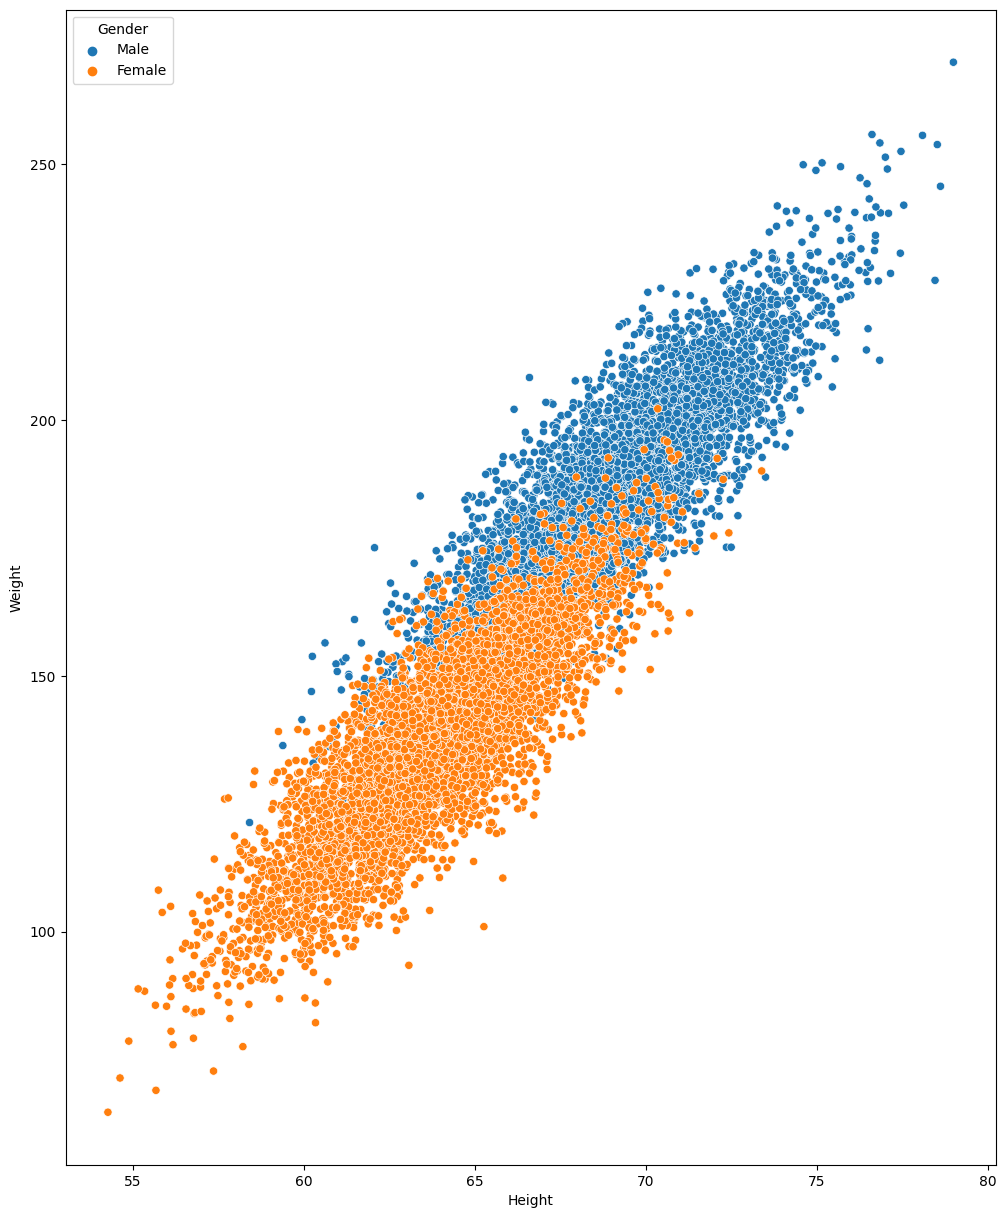

In [ ]:
plt.figure(figsize=(12, 15))
sns.scatterplot(data=df, x="Height", y="Weight",hue="Gender")
plt.show()

Removing Outliers

In [8]:
print("Old Shape: ", df.shape)
# IQR
# Calculate the upper and lower limits
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lowerh = Q1 - 1.5*IQR
upperh = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Height']>=upper)[0]
lower_array = np.where(df['Height']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


Old Shape:  (10000, 3)
New Shape:  (9992, 3)


In [10]:
print("Old Shape: ", df.shape)
# IQR
# Calculate the upper and lower limits
Q1 = df["Weight"].quantile(0.25)
Q3 = df["Weight"].quantile(0.75)
IQR = Q3 - Q1
lowerw = Q1 - 1.5*IQR
upperw = Q3 + 1.5*IQR

print(lowerw)
print(upperw)


# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df["Weight"]>=upperw)[0]
lower_array = np.where(df["Weight"]<=lowerw)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


Old Shape:  (9992, 3)
58.86620193294637
264.0797132136474
New Shape:  (9992, 3)


Pipelining ( preprocessing and model)

In [11]:
features=["Gender","Height"]
X=df[features]
y=df["Weight"]

X_train_full,X_test_full,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

numerical_cols=["Height"]
categorical_cols=["Gender"]
total_cols=categorical_cols+numerical_cols
X_train=X_train_full[total_cols].copy()
X_test=X_test_full[total_cols].copy()

print(X_train.columns)
print(categorical_cols)
print(numerical_cols)


Index(['Gender', 'Height'], dtype='object')
['Gender']
['Height']


In [12]:
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

preprocessed=preprocessor.fit_transform(X_train)
print(preprocessed)

[[69.50423744  0.          1.        ]
 [70.4909287   0.          1.        ]
 [72.87036015  0.          1.        ]
 ...
 [65.15943897  0.          1.        ]
 [66.11710005  1.          0.        ]
 [68.15370179  0.          1.        ]]


In [ ]:
model=XGBRegressor(n_estimators=500,learning_rate=0.01)

Answer and pipeline 1(XGBoost)

In [ ]:
my_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

my_pipeline.fit(X_train,y_train)

pred=my_pipeline.predict(X_test)

import math
error1=mean_squared_error(y_test,pred)
print(math.sqrt(error1))
error2=r2_score(y_test,pred)
print(error2)

10.036076480230724
0.9012810648635331


Answer and Pipeline 2( Random Forest)

In [ ]:
model2=RandomForestRegressor(n_estimators=500,random_state=42)

In [ ]:
my_pipeline1=Pipeline(steps=[('preprocessor',preprocessor),('model',model2)])

my_pipeline1.fit(X_train,y_train)

pred1=my_pipeline1.predict(X_test)

import math
error3=mean_squared_error(y_test,pred1)
print(math.sqrt(error3))
error4=r2_score(y_test,pred1)
print(error4)

12.04480928987416
0.8578089066303691


Hence,XGBOOST>RandomForest(duh, dumbass)

#GridSearch for Hyper-Parameters

###GridSearch is to go through a list of given parameters grid or randomised search to find the best hyperparametrs value for a specified metric (like "recall")



####Note : Grid search values and working changes by model and metric. Assess what is the best GridSearch metric for your problem and model and do accordingly

In [ ]:
from sklearn.model_selection import GridSearchCV

###Define Parameters grid

In [ ]:
params_grid={
    "n_estimators" : (400,450,500,550,600,650,700,750,800,900,1000),
    "learning_rate" : [0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.03,0.05]
}

Designing GridSearchCV

In [ ]:
modelgs=XGBRegressor()

grid_search=GridSearchCV(estimator=modelgs,param_grid=params_grid,cv=5,scoring='neg_root_mean_squared_error')

grid_search.fit(preprocessed,y_train)

best_params=grid_search.best_params_
best_score=np.sqrt(-grid_search.best_score_)
print(best_params)
print(best_score)

{'learning_rate': 0.01, 'n_estimators': 600}
3.189972922923351


Creating best model

In [ ]:
'''best_model=XGBRegressor(**best_params)'''
best_model=XGBRegressor(n_estimators=700,learning_rate=0.01)
best_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',best_model)])

best_pipeline.fit(X_train,y_train)
best_ans=best_pipeline.predict(X_test)
print(best_ans)
best_score=mean_squared_error(y_test,best_ans,squared=False)
print(best_score)
best_r2=r2_score(y_test,best_ans)
print(best_r2)

[127.71691 135.05106 122.82149 ...  98.62802 109.72324 162.89926]
9.985258768602339
0.9022782612127366


#Support Vector Machines : 
###Regression : to find a hyperplane that best fits the data points in feature space, according to the margin

SVMREGRESSOR

In [ ]:
from sklearn.svm import SVR

svrmodel=SVR(kernel='rbf',C=1.0,epsilon=0.2,gamma=0.1)

svrpipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',svrmodel)])

svrpipeline.fit(X_train,y_train)

pred=svrpipeline.predict(X_test)

print(pred)

svr_error=mean_squared_error(y_test,pred,squared=False)
svr_r2=r2_score(y_test,pred)

print(svr_error)
print(svr_r2)

[130.318627   133.971412   123.41662337 ... 104.81203405 108.33283381
 164.47670923]
9.984299330712293
0.9022970395812617


#Randomised Search

##We can used RandomisedSearchCV to improve above process

###Here is the code for a randomised search process for various values of SVR model hyperparameters and the results documented for 6 different iterations, each for differing values of best_params based on the param grid value for the random search given for that iteration 

####(Note : value of param_grid was changed after each iteration to try to maximise accuracy of predictions

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'kernel': ['rbf'],
    "C": [3.25,3.5,3.75,4.0,4.25,4.5,4.65,4.75],
    "gamma": [0.25,0.27,0.28,0.3,0.32,0.34,0.35],
    "epsilon":[0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
}

random_search = RandomizedSearchCV(svrmodel, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(preprocessed, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Make predictions using the best model
svr_best_model = random_search.best_estimator_

svrbestpipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',svr_best_model)])

svrbestpipeline.fit(X_train,y_train)

pred=svrbestpipeline.predict(X_test)

print(pred)

svr_error=mean_squared_error(y_test,pred,squared=False)
svr_r2=r2_score(y_test,pred)

print(svr_error)
print(svr_r2)
'''note : epsilon affects training data fit vs test data fit, you want to create a model that fits well to test data and unseen data more than your training dataset alone'''

'''current best values : C-2.0,gamma-0.2,epsilon-0.4,rmse=9.911196935337697,r2=0.9037225123393926
new best values 1 :{'kernel': 'rbf', 'gamma': 0.22, 'epsilon': 0.7, 'C': 2.5}, rmse=9.900256424378286,r2=0.9039349475391951
new best values 2 :{'kernel': 'rbf', 'gamma': 0.22, 'epsilon': 0.7, 'C': 3.0},rmse=9.897750763151079,r2=0.903983567697433
new best values 3 :{'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 0.8, 'C': 3.75},rmse=9.894744421313085,r2=0.9040418868824607
new best values 4 :{'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 1.2, 'C': 4.25},rmse=9.890720816412465,r2=0.9041199119463308
new best values 5:{'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 1.1, 'C': 4.75},rmse=9.889832759484033,r2=0.9041371287206256

'''



Best Parameters: {'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 1.1, 'C': 4.75}
Best Score: 0.9003512889156597
[129.99319201 133.86370022 122.89533132 ...  99.00862961 108.03321378
 164.66106689]
9.889832759484033
0.9041371287206256


"current best values : C-2.0,gamma-0.2,epsilon-0.4,rmse=9.911196935337697,r2=0.9037225123393926\nnew best values 1 :{'kernel': 'rbf', 'gamma': 0.22, 'epsilon': 0.7, 'C': 2.5}, rmse=9.900256424378286,r2=0.9039349475391951\nnew best values 2 :{'kernel': 'rbf', 'gamma': 0.22, 'epsilon': 0.7, 'C': 3.0},rmse=9.897750763151079,r2=0.903983567697433\nnew best values 3 :{'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 0.8, 'C': 3.75},rmse=9.894744421313085,r2=0.9040418868824607\nnew best values 4 :{'kernel': 'rbf', 'gamma': 0.25, 'epsilon': 1.2, 'C': 4.25},rmse=9.890720816412465,r2=0.9041199119463308\n"

Normalised RMSE value for the final model we settled on after 6 iterations of randomised search

In [13]:
final_rmse=9.889832759484033
nrmse=final_rmse/(upperw-lowerw)
print(nrmse)

0.0481928928449367


#By : Karthik Sabareesh
Github: https://github.com/KarthikSabareesh